# ABM results

In [85]:
import pandas as pd
import sys
sys.path.insert(0, "abetam")
from abetam.batch import BatchResult
from main import add_abm_demand_to_projection
result_path = "abetam/results/master/0a1d8cd9a096f9edb11679f1db00c3f3_0"
b_res = BatchResult.from_directory(result_path)
tech_share_fig = b_res.tech_shares_fig()


ImportError: cannot import name 'modify_carbon_tax' from 'scenarios' (c:\src\canadopt\abetam\scenarios\__init__.py)

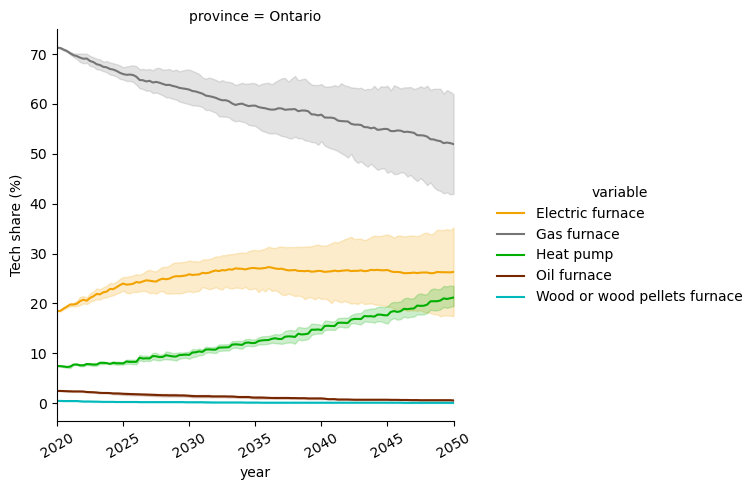

In [ ]:
tech_share_fig.fig.axes[0].set_xlim((2020, 2050))

tech_share_fig.figure

In [ ]:
import plotly.express as px
model_demand = b_res.mean_carrier_demand_df
energy_demand_df_long = model_demand.groupby(["province","year"]).sum().reset_index().melt(id_vars=["province","year"])

energy_demand_df_long["value"] = energy_demand_df_long["value"].astype(float)
energy_demand_df_long["fuel"] = energy_demand_df_long["variable"].str.split(".", expand=True)[0]

energy_demand_df_long


,province,year,variable,value,fuel
0,Ontario,2020.0,Fuels.NATURAL_GAS,9.273691e+10,Natural gas
1,Ontario,2025.0,Fuels.NATURAL_GAS,8.590769e+10,Natural gas
2,Ontario,2030.0,Fuels.NATURAL_GAS,8.188707e+10,Natural gas
3,Ontario,2035.0,Fuels.NATURAL_GAS,7.820968e+10,Natural gas
4,Ontario,2040.0,Fuels.NATURAL_GAS,7.594273e+10,Natural gas
5,Ontario,2045.0,Fuels.NATURAL_GAS,7.220131e+10,Natural gas
6,Ontario,2050.0,Fuels.NATURAL_GAS,6.811571e+10,Natural gas
7,Ontario,2020.0,Fuels.HEATING_OIL,3.261190e+09,Heating oil
8,Ontario,2025.0,Fuels.HEATING_OIL,2.498882e+09,Heating oil
9,Ontario,2030.0,Fuels.HEATING_OIL,1.852482e+09,Heating oil


In [ ]:
from abetam.figures import sciencify_plotly_fig
from abetam.config import FUEL_COLORS
fig = px.bar(
    energy_demand_df_long,
    x="year",
    y="value",
    color="fuel",
    color_discrete_map=FUEL_COLORS,
)
fig.update_layout(xaxis_title="Year", yaxis_title="Energy demand (kWh/a)", width=500, legend_traceorder="reversed")
sciencify_plotly_fig(fig)


In [ ]:
model_demand = b_res.mean_carrier_demand_df
new_demand = add_abm_demand_to_projection(model_demand)
abm_inkl_peaks = new_demand.max().reset_index()
abm_inkl_peaks[["province","year"]] = abm_inkl_peaks["index"].str.split(".",expand=True)
abm_inkl_peaks = abm_inkl_peaks.rename({0:"ABM_incl"}, axis=1).drop(["index","province"],axis=1)
abm_inkl_peaks

,ABM_incl,year
0,20153.212295,2020
1,23427.833787,2025
2,28218.998288,2030
3,34389.004031,2035
4,39840.216979,2040
5,44018.701047,2045
6,47290.178604,2050


In [ ]:
copper_demand_projection = pd.read_csv("copper/results/BAU_scenario_20240315_1125/demand_df_user_demand=False.csv")
copper_demand_projection.columns = ["year","hour"] + copper_demand_projection.columns[2:].to_list()
copper_demand_projection["Ontario"] = copper_demand_projection["Ontario.a"] + copper_demand_projection["Ontario.b"]

copper_demand_peaks = copper_demand_projection.groupby(["year"]).max()["Ontario"].reset_index()
copper_demand_peaks = copper_demand_peaks.rename({"Ontario":"COPPER projection"}, axis=1)
copper_demand_peaks.melt(id_vars="year")

,year,variable,value
0,2025,COPPER projection,23836.863269
1,2030,COPPER projection,25113.331501
2,2035,COPPER projection,26578.906183
3,2040,COPPER projection,29056.200162
4,2045,COPPER projection,30619.891274
5,2050,COPPER projection,32917.383850


In [ ]:
import plotly.express as px
from abetam.figures import sciencify_plotly_fig
both_demands = pd.concat([abm_inkl_peaks.melt(id_vars="year"),copper_demand_peaks.melt(id_vars="year")])
fig = sciencify_plotly_fig(px.line(both_demands, x="year", y="value", color="variable", template="plotly"))
fig.update_layout(yaxis_title="Peak demand (MW)") 

# Results of the coupled model

In [54]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from pathlib import Path
import pandas as pd

from abetam.figures import sciencify_plotly_fig

def copper_result_dir(abm_result_dir: Path):
    scen_date, iteration = abm_result_dir.stem.rsplit("_",1)
    result_dirs = list(Path(f"copper/results/{scen_date}").iterdir())
    result_dirs = sorted(result_dirs)
    return result_dirs[int(iteration)]

abm_result_dirs = Path("results").iterdir()
date = "202405"
abm_result_dirs = [d for d in abm_result_dirs if date in d.name]
# abm_result_dirs
result_df = pd.DataFrame(list([(d, copper_result_dir(d)) for d in sorted(abm_result_dirs)]), columns=["ABM path", "ESM path"])
result_df["iteration"] = result_df["ABM path"].apply( lambda p: p.stem.rsplit("_",1)[-1]).astype(int)

result_df["Scenario"] = result_df["ABM path"].apply( lambda p: p.stem.split("_",1)[0])

scen_mod = result_df["ABM path"].apply(lambda p: "+" if "_plus" in p.stem else "")

result_df["Scenario"] = result_df["Scenario"] + scen_mod

result_df

,ABM path,ESM path,iteration,Scenario
0,results\BAU_20240508_0752_0,copper\results\BAU_20240508_0752\BAU_scenario_...,0,BAU
1,results\BAU_20240508_0752_1,copper\results\BAU_20240508_0752\BAU_scenario_...,1,BAU
2,results\CER_20240507_1016_0,copper\results\CER_20240507_1016\CER_scenario_...,0,CER
3,results\CER_20240507_1016_1,copper\results\CER_20240507_1016\CER_scenario_...,1,CER
4,results\CER_plus_20240507_1033_0,copper\results\CER_plus_20240507_1033\CER_scen...,0,CER+
5,results\CER_plus_20240507_1033_1,copper\results\CER_plus_20240507_1033\CER_scen...,1,CER+
6,results\Rapid_20240508_0725_0,copper\results\Rapid_20240508_0725\CER_scenari...,0,Rapid
7,results\Rapid_20240508_0725_1,copper\results\Rapid_20240508_0725\CER_scenari...,1,Rapid
8,results\Rapid_plus_20240508_0823_0,copper\results\Rapid_plus_20240508_0823\CER_sc...,0,Rapid+
9,results\Rapid_plus_20240508_0823_1,copper\results\Rapid_plus_20240508_0823\CER_sc...,1,Rapid+


In [17]:
# # zip all the results
# from zipfile import ZipFile, ZIP_DEFLATED
# from pathlib import Path

# with ZipFile("results.zip","w", compression=ZIP_DEFLATED, compresslevel=9) as zf:
#     for path in result_df["ABM path"]:
#         for f in path.rglob("*"):
#             zf.write(f, f)
#     for path in result_df["ESM path"]:
#         for f in path.rglob("*"):
#             zf.write(f, f)


In [53]:
from zipfile import ZipFile
from pathlib import Path

# unzip all the results
filenames :list[str]= []
with ZipFile("results_240508","r") as zf:
    file_list = zf.filelist
    for f in file_list:
        fn = f.filename
        zf.extract(f,)
        filenames.append(fn)

## ABM Adoption and energy demands

In [19]:
retrofitted_households = (335/500)*5.169*1e6
buildings_per_household = (1639581/(5.169*1e6))
retrofitted_buildings = retrofitted_households* buildings_per_household
retrofitted_households,buildings_per_household,retrofitted_buildings
retrofitted_buildings*100000/1e9

109.851927

In [55]:
import sys 
sys.path.insert(0,"abetam")
from abetam.batch import BatchResult
import seaborn as sns
from abetam.data.canada import (
    uncertain_demand_from_income_and_province,
    get_end_use_agg_heating_share
)
from abetam.components.model import get_income_and_attitude_weights

def get_demand_reductions(n):
    dem_red = np.random.normal(0.4875, 0.125, n)
    # ensure (0,1) boundaries
    dem_red[dem_red < 0] = -dem_red[dem_red < 0]
    dem_red[dem_red > 1] = 1 - (dem_red[dem_red > 1] - 1)
    return dem_red

def mean_energy_demand(n):
    province = "Ontario"
    price_weight_mode = 0.55
    start_year=2020
    income_distribution, weights_df = get_income_and_attitude_weights(
        n, price_weight_mode=price_weight_mode
    )
    total_energy_demand = uncertain_demand_from_income_and_province(
        income_distribution, province
    )

    province_heat_share = get_end_use_agg_heating_share(province, start_year)
    heat_demand = total_energy_demand * province_heat_share
    return heat_demand.mean()

def get_scenario_retrofit_cost(abm_res):
    no_refurbishments = abm_res.results_df[["RunId","AgentID","Refurbished","Heat demand"]].drop_duplicates().groupby("RunId")["Refurbished"].sum()
    assert no_refurbishments[0] == no_refurbishments.mean()

    mean_demand = mean_energy_demand(no_refurbishments[0])
    demand_frame = abm_res.results_df[["RunId","Step","AgentID","Heat demand"]].query("Step == 0")
    demand_frame["n_households"] = demand_frame["Heat demand"]/mean_demand
    demand_frame = demand_frame.groupby("RunId").sum()
    seeds = abm_res.results_df[["RunId","random_seed"]].drop_duplicates().set_index("RunId")
    seeds["n_households"] = demand_frame["n_households"]
    no_res_buildings = 1639581 #https://open.canada.ca/data/en/dataset/7803173f-8ab7-428c-b987-74bbde245e12/resource/6cc8a832-11d5-4d9a-9796-397905490dc1
    no_households = 5.169*1e6 # https://www.ontario.ca/page/ontario-demographic-quarterly-highlights-first-quarter

    households_per_building = no_households/no_res_buildings

    max_build_work_cost = 100000
    total_retrofit_costs = pd.DataFrame()
    refurbished_share = no_refurbishments[0]/abm_res.results_df["AgentID"].max()
    for r_id, seed, n_households in seeds.itertuples():
        # _, r_id, seed = tupl
        np.random.seed(seed)
        dem_reds = get_demand_reductions(no_refurbishments[0])

        # assume maximum reduction == maximum cost
        dem_reds /= dem_reds.max()
        retrofit_costs = (dem_reds*max_build_work_cost).mean()*no_households*refurbished_share/households_per_building
        # print(n_households/households_per_building)

        total_retrofit_costs.at[r_id,"Retrofit costs (CAD)"] = retrofit_costs

    total_retrofit_costs["scenario"] = scenario
    return total_retrofit_costs




In [135]:


tech_share_dfs = []
fuel_demands = []
subsidy_dfs = []
emission_dfs = []
lcoh_dfs = []
spendings_dfs = []
retrofit_costs = []

for scenario in result_df.Scenario.unique():
    # print(scenario,":", result_df.query(f"iteration==1 and Scenario=='{scenario}'"))
    abm_res = BatchResult.from_directory(result_df.query(f"iteration==1 and Scenario=='{scenario}'")["ABM path"].values[0])
    t_share_df = abm_res.tech_shares_df
    t_share_df["scenario"] = scenario
    tech_share_dfs.append(t_share_df)

    demands = abm_res.mean_carrier_demand_df.copy()
    demands["scenario"] = scenario
    fuel_demands.append(demands)

    subs = abm_res.subsidies_df
    subs["scenario"] = scenario
    subsidy_dfs.append(subs)

    emiss = abm_res.emissions()
    emiss["scenario"] = scenario
    emission_dfs.append(emiss)

    lcohs = pd.DataFrame.from_records(abm_res.results_df["LCOH"])
    lcohs[['year','RunId','AgentID',"Refurbished"]] = abm_res.results_df[['year','RunId','AgentID',"Refurbished"]]
    long_lcohs = lcohs.set_index(["year","RunId","AgentID","Refurbished"]).melt(ignore_index=False).reset_index().drop("AgentID", axis=1)
    long_lcohs = long_lcohs.round(2).drop_duplicates().groupby(["year","variable"]).mean().reset_index()
    long_lcohs["scenario"] = scenario
    lcoh_dfs.append(long_lcohs)

    adopt_df = abm_res.adoption_details_df.set_index(['RunId','AgentID','year',])
    adopt_df["req. size"] = abm_res.results_df[['RunId','AgentID','year','Required heating size']].set_index(['RunId','AgentID','year']).loc[adopt_df.index,'Required heating size']
    adopt_df["Purchase cost"] = adopt_df["purchase_price"] * adopt_df["req. size"]
    total_spendings = adopt_df.groupby(["RunId", "tech"])["Purchase cost"].sum().groupby("tech").mean().reset_index()
    total_spendings["scenario"] = scenario
    spendings_dfs.append(total_spendings)

    retrofit_costs.append(get_scenario_retrofit_cost(abm_res))

scenario_tech_shares = pd.concat(tech_share_dfs)
scenario_fuel_demands = pd.concat(fuel_demands)
scenario_emissions = pd.concat(emission_dfs)
scenario_subsidies = pd.concat(subsidy_dfs)
scenario_lcohs = pd.concat(lcoh_dfs)
scenario_spendings = pd.concat(spendings_dfs)
scenario_retrofit_costs = pd.concat(retrofit_costs)

scenario_emissions.head()


,Fuels.ELECTRICITY,Fuels.HEATING_OIL,Fuels.NATURAL_GAS,Fuels.WOOD_OR_WOOD_PELLETS,scenario
2020,0.459073,1.585318,18.620314,0.092339,BAU
2021,0.466375,1.518038,18.441648,0.085799,BAU
2022,0.473677,1.450757,18.262982,0.079259,BAU
2023,0.480979,1.383477,18.084317,0.072720,BAU
2024,0.488281,1.316196,17.905651,0.066180,BAU


In [57]:
import plotly.express as px

rtrft_fig = px.box(scenario_retrofit_costs, x="scenario",y="Retrofit costs (CAD)", color="scenario", template="plotly", width=400,)
rtrft_fig = sciencify_plotly_fig(rtrft_fig)
rtrft_fig.update_layout(showlegend=False, margin=dict(r=10,t=10,b=10), height=350, font_family="cm",font_size=18)
rtrft_fig.write_image("abm_retrofit_cost.svg")
rtrft_fig.write_image("abm_retrofit_cost.pdf",engine="kaleido")
rtrft_fig

In [58]:
scenario_fuel_demands_long = scenario_fuel_demands.groupby(["year","scenario"]).sum().melt(ignore_index=False).reset_index()
scenario_fuel_demands_long["value"] /= 1e9 # kWh -> TWh
# scenario_fuel_demands_long.query("year>2049")
scenario_fuel_demands_long.query("year<2021")

,year,scenario,variable,value
0,2020.0,BAU,Fuels.NATURAL_GAS,93.101569
1,2020.0,CER,Fuels.NATURAL_GAS,92.523135
2,2020.0,CER+,Fuels.NATURAL_GAS,92.725706
3,2020.0,Rapid,Fuels.NATURAL_GAS,92.272615
4,2020.0,Rapid+,Fuels.NATURAL_GAS,92.097828
35,2020.0,BAU,Fuels.HEATING_OIL,3.170636
36,2020.0,CER,Fuels.HEATING_OIL,3.127504
37,2020.0,CER+,Fuels.HEATING_OIL,3.15805
38,2020.0,Rapid,Fuels.HEATING_OIL,3.134969
39,2020.0,Rapid+,Fuels.HEATING_OIL,3.170636


In [59]:
from abetam.config import TECHNOLOGY_COLORS, FUEL_COLORS
from abetam.components.technologies import Fuels
ABM_colors = dict(TECHNOLOGY_COLORS, **FUEL_COLORS)

scenario_tech_shares_long = scenario_tech_shares.drop(["province","RunId"], axis=1).melt(id_vars=["year","scenario"]) 
abm_results = pd.concat([scenario_tech_shares_long, scenario_fuel_demands_long])
def is_fuel(v):
    return v in list(Fuels)
abm_results["is_demand"] = abm_results["variable"].apply(is_fuel)

abm_results["variable"] = abm_results["variable"].str.replace("Wood or wood pellets", "Biomass")
ABM_colors["Biomass furnace"] = ABM_colors["Wood or wood pellets furnace"]
ABM_colors["Biomass"] = ABM_colors["Wood or wood pellets"]
abm_results.tail()



,year,scenario,variable,value,is_demand
135,2050.0,BAU,Electricity,28.958174,True
136,2050.0,CER,Electricity,25.374341,True
137,2050.0,CER+,Electricity,59.161616,True
138,2050.0,Rapid,Electricity,16.48489,True
139,2050.0,Rapid+,Electricity,19.591223,True


0 False BAU 3630
1 False CER 3630
2 False CER+ 3630
3 False Rapid 3630
4 False Rapid+ 3630
5 True BAU 28
6 True CER 28
7 True CER+ 28
8 True Rapid 28
9 True Rapid+ 28


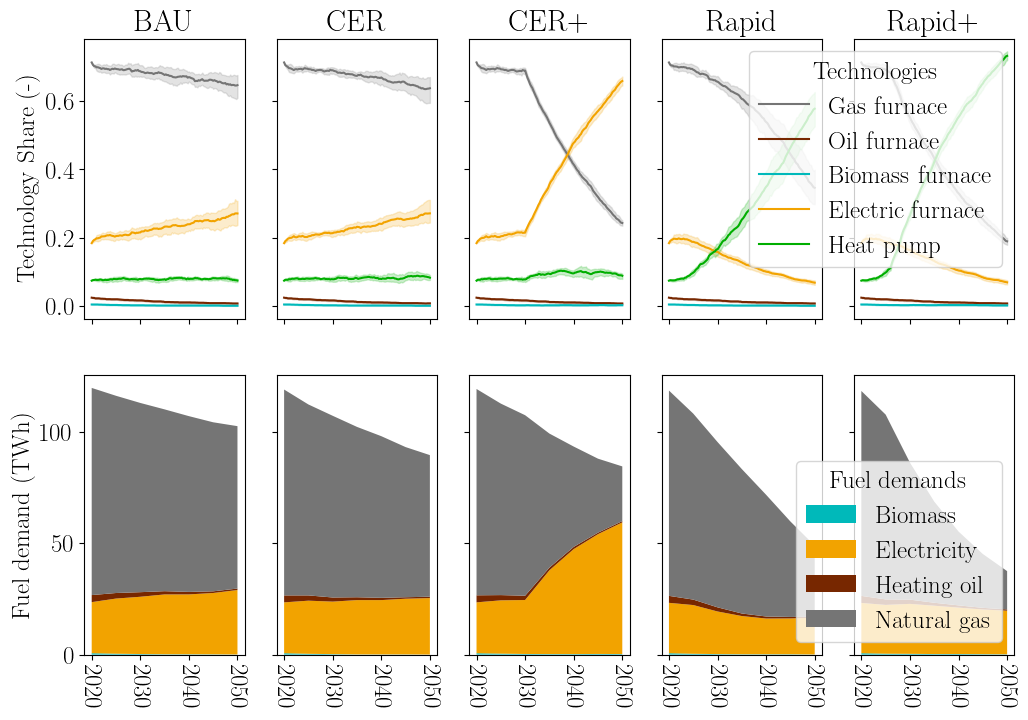

In [113]:
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "cm"
plt.rcParams["font.size"] = "18"
plt.rcParams['svg.fonttype'] = 'none'

fuel_name_map = dict(zip(Fuels, [x.value for x in Fuels]))
fuel_name_map["Biomass"] = "Biomass"

abm_fig, axs = plt.subplots(ncols=5, nrows=2,  sharex='all', sharey='row', figsize=(12,8))
for i,(dem_scen, df) in enumerate(abm_results.groupby(["is_demand","scenario"])):
    print(i,dem_scen[0],dem_scen[1],len(df))
    ax = axs.flat[i]
    if not dem_scen[0]:
        ax.title.set_text(f"{dem_scen[1]}")
        show_legend = i==4
        sns.lineplot(data=df, x="year", y="value", hue="variable", palette=ABM_colors, ax=ax, legend=show_legend)
        if show_legend:
            ax.get_legend().set_title("Technologies")
    else:
        show_legend = i==9
        wide_df = df.pivot(columns="variable", values="value", index="year")
        wide_columns = wide_df.columns
        column_vals = [wide_df[col].astype(float) for col in wide_columns]
        ax.stackplot(wide_df.index, *column_vals, colors=[ABM_colors[col] for col in wide_columns], labels=[fuel_name_map[col] for col in wide_columns])
        if show_legend:
            ax.legend(loc="lower right")
            ax.get_legend().set_title("Fuel demands")


abm_fig.axes[0].set_ylabel("Technology Share (-)")
abm_fig.axes[5].set_ylabel("Fuel demand (TWh)")
abm_fig.axes[0].set_xticks(range(2020,2051,10))
for ax in abm_fig.axes:
    ax.set_xticklabels(range(2020,2051,10), rotation=-90)


## ABM: Emissions and subsidies

In [116]:
total_scenario_emissions = scenario_emissions.reset_index().groupby(["index","scenario"]).sum().sum(axis=1).reset_index()
total_scenario_emissions["cumulative"] = total_scenario_emissions.groupby("scenario").cumsum()[0]
# px.line(total_scenario_emissions, x="index", y="cumulative", color="scenario", template="plotly")

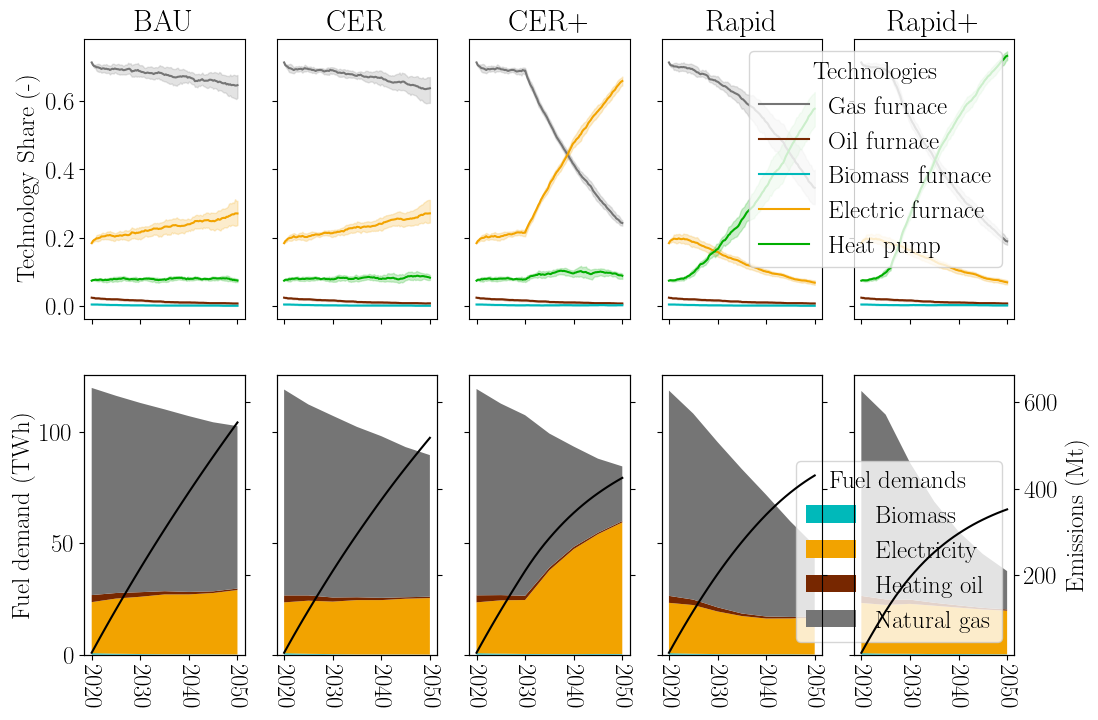

In [117]:
em_y_lim = total_scenario_emissions.cumulative.min()*0.8, total_scenario_emissions.cumulative.max()*1.2
emission_color = "black"
for i, (scen, df) in enumerate(total_scenario_emissions.groupby("scenario")):
    # print(scen, df)
    t_ax = axs.flat[5+i].twinx()
    t_ax.plot(df["index"],df["cumulative"], color=emission_color)
    t_ax.set_ylim(*em_y_lim)
    t_ax.spines["right"].set_color(emission_color)
    t_ax.tick_params(colors=emission_color, which='both')
    last = i==4
    if not last:
        t_ax.set_yticklabels([])
    else:
        t_ax.set_ylabel("Emissions (Mt)")
abm_fig.savefig("abm_results.svg")
abm_fig

In [64]:
import plotly.express as px
subsidies_plot_df = scenario_subsidies.groupby(["year","scenario"])[["hp specific cost", "Cumulative subsidy amount (CAD)"]].mean()
px.line(subsidies_plot_df.reset_index(), x="year", y=["Cumulative subsidy amount (CAD)","hp specific cost"], color="scenario", template="plotly", width=600)

In [136]:
scenario_spendings["tech"] = scenario_spendings["tech"].str.replace("Wood or wood pellets", "Biomass")


In [138]:
scenario_spendings.reset_index(inplace=True, drop=True)
scenario_spendings

,tech,Purchase cost,scenario
0,Electric furnace,1.407949e+09,BAU
1,Gas furnace,7.368535e+09,BAU
2,Heat pump,4.646707e+09,BAU
3,Electric furnace,1.311363e+09,CER
4,Gas furnace,6.842150e+09,CER
5,Heat pump,4.475299e+09,CER
6,Oil furnace,1.755097e+07,CER
7,Electric furnace,3.170855e+09,CER+
8,Gas furnace,2.587068e+09,CER+
9,Heat pump,5.491848e+09,CER+


In [139]:
def subs_fac(name):
    if "CER" in name:
        return 0.15
    elif "Rapid" in name:
        return 0.3
    else:
        return 0


subsidies = scenario_spendings.query("tech=='Heat pump' and scenario!='BAU'")
subsidies_amount = subsidies["Purchase cost"] * subsidies["scenario"].apply(subs_fac)
scenario_spendings.loc[subsidies_amount.index,"Purchase cost"] -= subsidies_amount
subsidies["Purchase cost"] = subsidies_amount.values
subsidies["tech"] = "Subsidies"
scenario_spendings = pd.concat([scenario_spendings, subsidies])

C:\Users\dhuck\AppData\Local\Temp\ipykernel_29728\1289925645.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dhuck\AppData\Local\Temp\ipykernel_29728\1289925645.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [142]:
scenario_spendings.loc[subsidies_amount.index,:]

,tech,Purchase cost,scenario
5,Heat pump,3.804004e+09,CER
5,Subsidies,6.712949e+08,CER
9,Heat pump,4.668071e+09,CER+
9,Subsidies,8.237772e+08,CER+
13,Heat pump,1.886868e+10,Rapid
13,Subsidies,8.086578e+09,Rapid
16,Heat pump,2.675602e+10,Rapid+
16,Subsidies,1.146687e+10,Rapid+


In [143]:
ABM_colors

{'Gas furnace': '#757575',
 'Oil furnace': '#772700',
 'Wood or wood pellets furnace': '#00b9ba',
 'Electric furnace': '#f2a300',
 'Heat pump': '#00ae00',
 'Natural gas': '#757575',
 'Heating oil': '#772700',
 'Wood or wood pellets': '#00b9ba',
 'Electricity': '#f2a300',
 'Diesel': '#ffffff',
 'Gasoline': '#ffffff',
 'Propane': '#2e2e2e',
 'Oil': '#772700',
 'Biomass furnace': '#00b9ba',
 'Biomass': '#00b9ba'}

In [149]:
ABM_colors.update({"Subsidies":"#ae00ae"})
fig = sciencify_plotly_fig(
    px.bar(
        scenario_spendings,
        x="scenario",
        y="Purchase cost",
        color="tech",
        color_discrete_map=ABM_colors,
    )
)
fig.update_layout(
    yaxis_title="Total spendings (CAD)",
    xaxis_title="",
    legend=dict(
        title_text=None,
        # bgcolor="LightSteelBlue",
        bordercolor="gray",
        borderwidth=2,
        x=0.02,
        y=0.98,
        traceorder="reversed",
    ),
    width=500,
    font_family="cm",
    font_size=18
)
fig.write_image("abm_total_spendings.pdf")
fig.write_image("abm_total_spendings.svg")
fig

In [67]:
total_emissions = total_scenario_emissions.groupby("scenario")[0].sum()
avoided_emissions = total_emissions["BAU"] - total_emissions
total_subsidies = subsidies_plot_df.loc[2050,"Cumulative subsidy amount (CAD)"]*1e-6
carbon_avoidance_cost = total_subsidies/avoided_emissions

summary_df = pd.concat(
    [total_emissions, total_subsidies, avoided_emissions, carbon_avoidance_cost],
    axis=1,
).fillna(0).round(2)
summary_df.columns = ["Total emissions (Mt)","Total subsidies (MCAD)","Avoided emissions (Mt)","Carbon avoidance cost (CAD/t)",]
print(summary_df.to_latex().replace("0000",""))

\begin{tabular}{lrrrr}
\toprule
 & Total emissions (Mt) & Total subsidies (MCAD) & Avoided emissions (Mt) & Carbon avoidance cost (CAD/t) \\
scenario &  &  &  &  \\
\midrule
BAU & 552.89 & 0.00 & 0.00 & 0.00 \\
CER & 517.34 & 587.13 & 35.55 & 16.51 \\
CER+ & 424.80 & 694.10 & 128.10 & 5.42 \\
Rapid & 430.36 & 6734.69 & 122.53 & 54.96 \\
Rapid+ & 351.99 & 9469.96 & 200.91 & 47.14 \\
\bottomrule
\end{tabular}



## ABM: LCOH

In [68]:
scenario_lcohs.pivot(columns="scenario", index=["year","variable"], values="value").query("variable=='Heat pump'")

,scenario,BAU,CER,CER+,Rapid,Rapid+
year,variable,,,,,
2020.00,Heat pump,0.068000,0.060000,0.060000,0.056667,0.056667
2020.25,Heat pump,0.068000,0.064000,0.064000,0.060769,0.060000
2020.50,Heat pump,0.068000,0.064000,0.064000,0.061111,0.060000
2020.75,Heat pump,0.068000,0.064286,0.064000,0.061429,0.060000
2021.00,Heat pump,0.067059,0.064545,0.064545,0.061429,0.061111
...,...,...,...,...,...,...
2049.00,Heat pump,0.071724,0.068387,0.069091,0.066154,0.066216
2049.25,Heat pump,0.071429,0.068387,0.069091,0.066154,0.066216
2049.50,Heat pump,0.071429,0.068387,0.069091,0.066154,0.066216


In [69]:
scenario_lcohs["variable"] = scenario_lcohs["variable"].str.replace("Wood or wood pellets", "Biomass")
fig = sciencify_plotly_fig(
    px.line(
        scenario_lcohs,#.query("scenario=='BAU'"),
        x="year",
        y="value",
        color="variable",
        facet_col="scenario",
        template="plotly",
        color_discrete_map=ABM_colors,
        width=500
    )
)
fig.update_layout(
    yaxis_title="LCOH (CAD/kWh)",
    legend=dict(
        title_text="Technologies",
        bordercolor="gray",
        borderwidth=2,
        x=0.3,
        y=0.88,
        traceorder="reversed",
    ),
    width=500,
    font_family="cm",
    font_size=18
)
fig.write_image("abm_lcoh.svg")
fig.write_image("abm_lcoh.pdf")
fig

## Copper: demands/supplied energy

In [70]:
from copper.phases.postprocessing import get_all_supply

total_demand_dfs = []
peak_demand_dfs = []
supply_dfs = []
supply_share_dfs = []
for scenario in result_df.Scenario.unique():
    path = result_df.query(f"iteration==1 and Scenario=='{scenario}'")["ESM path"].values[0]
    sup_df = get_all_supply(path)

    total_demand = sup_df.groupby(["pds"])[["value"]].sum().reset_index()
    total_demand["scenario"] = scenario
    total_demand_dfs.append(total_demand)
    
    peak_demand = sup_df.groupby(["pds","h"])[["value"]].sum().reset_index().groupby("pds").max().reset_index().drop("h", axis=1)
    peak_demand["scenario"] = scenario
    peak_demand_dfs.append(peak_demand)

    supply_share_by_type = sup_df.groupby(["pds","Type"]).sum()/sup_df.groupby(["pds"]).sum()
    is_supply = supply_share_by_type.reset_index()["value"] > 0
    supply_share_by_type = supply_share_by_type.reset_index().loc[is_supply,:]
    supply_share_by_type["scenario"] = scenario
    supply_share_dfs.append(supply_share_by_type)
    
    sup_df["scenario"] = scenario
    supply_dfs.append(sup_df)

scen_supply_df = pd.concat(supply_dfs)
scen_total_demand_df = pd.concat(total_demand_dfs)    
scen_peak_demand_df = pd.concat(peak_demand_dfs)
scen_supply_share_df = pd.concat(supply_share_dfs)    

In [71]:
scen_total_demand_df.pivot(columns="scenario", index="pds", values="value")

scenario,BAU,CER,CER+,Rapid,Rapid+
pds,,,,,
2025,4.828692e+06,4.596896e+06,4.599614e+06,4.525891e+06,4.527140e+06
2030,5.800645e+06,5.524671e+06,5.548044e+06,5.365635e+06,5.486411e+06
2035,7.260622e+06,6.930573e+06,7.414793e+06,6.661930e+06,6.829068e+06
2040,8.576756e+06,8.248204e+06,9.068935e+06,7.943081e+06,8.105314e+06
2045,9.515362e+06,9.170115e+06,1.023836e+07,8.864469e+06,9.000199e+06
2050,1.030407e+07,9.908308e+06,1.116390e+07,9.646039e+06,9.746138e+06


In [72]:
from viz.copper import tech_agg

def get_nice_tech_name(key):
    try:
        nice_name = tech_agg[key]
    except KeyError as ke:
        nice_name = key
    
    return nice_name


scen_supply_share_df["Generator"] = scen_supply_share_df.Type.apply(get_nice_tech_name)
scen_supply_share_df = scen_supply_share_df.groupby(["pds","Generator","scenario"])[["value"]].sum().reset_index()


In [73]:
scen_supply_share_df.query("pds==2050").pivot(columns="scenario",index="Generator",values="value")

scenario,BAU,CER,CER+,Rapid,Rapid+
Generator,,,,,
Biomass,NaN,NaN,0.001640,0.001119,0.001134
Fossil fuel gas,0.172841,0.007505,0.010414,NaN,NaN
Hydro,0.034026,0.038704,0.034703,0.037352,0.037116
Hydrogen - blue,NaN,0.053988,0.060274,NaN,NaN
Hydrogen - green,NaN,NaN,NaN,0.001156,0.000949
Nuclear,0.082439,0.078821,0.067408,0.106902,0.109422
Solar,0.035048,0.070608,0.074176,0.068116,0.063575
Wind,0.675646,0.750375,0.751386,0.785357,0.787805


In [74]:
import plotly.express as px
from abetam.figures import sciencify_plotly_fig
from viz.copper import IDEA_COLORS

gen_sharefig = px.area(scen_supply_share_df, x="pds", y="value", color="Generator", facet_col="scenario", template="plotly", width=900, color_discrete_map=IDEA_COLORS)
gen_sharefig.for_each_trace(lambda trace: trace.update(fillcolor = trace.line.color, line_width=0))
gen_sharefig = sciencify_plotly_fig(gen_sharefig)
gen_sharefig = gen_sharefig.update_layout(
    yaxis_title="Generation share (-)",
    xaxis1_title="year",
    xaxis2_title="year",
    xaxis3_title="year",
)

In [75]:
# # scale with no. rundays
# scen_total_demand_df["value"] *= 365/12
# # px.line(scen_total_demand_df, x="pds", y="value", color="scenario", template="plotly", width=700)

In [76]:
# scen_peak_demand_df["demand_type"] = "Peak demand"
# scen_total_demand_df["demand_type"] = "Total demand"
# fig = px.line(pd.concat([scen_peak_demand_df, scen_total_demand_df]), x="pds", y="value", color="scenario", facet_row="demand_type", template="plotly", width=600)
# fig = fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# fig.update_yaxes(matches=None)

In [77]:
import plotly.express as px

# total_demand["h"] = total_demand["h"].astype("str")
#px.line(total_demand, x="h", y="value", color="pds", template="plotly")

## Copper installed capacity

In [78]:
from viz.copper import tech_agg, IDEA_COLORS
import pandas as pd
gridcell_data = pd.read_csv('copper/scenarios/static/gridcells.csv')
map_gl_to_ba=dict(gridcell_data[['grid_cell', 'ba']].values)


def get_capacity_frame(results_dir):
    capacitiy_files = list(Path(results_dir).glob("capacity_*"))
    generation_dfs = []
    therm_df = None
    transmission_df = None
    storage_df = None
    for f in capacitiy_files:
        if "transmission" in f.as_posix():
            transmission_df = pd.read_csv(f)
            assert transmission_df["value"].sum() == 0
        elif "storage" in f.as_posix():
            storage_df = pd.read_csv(f).rename({"st":"type"}, axis=1)
            storage_df["gl"] = None
            generation_dfs.append(storage_df)
        else:
            df = pd.read_csv(f)
            gen_type = f.stem.split("_",1)[-1]
            if "tplants" in df.columns:
                therm_df = df.copy()
                df = df.rename({"tplants":"type"}, axis=1)
                df["gl"] = None
            else:
                df["type"] = gen_type
                df["aba"] = df["gl"].apply(map_gl_to_ba.get)
            # print(gen_type, df.columns)
            generation_dfs.append(df)
    retire_df = pd.read_csv(Path(results_dir)/"retire_therm.csv").rename({"tplants":"type"}, axis=1)
    retire_df["type"] = retire_df["type"] + "_retire"
    gen_cap_df = pd.concat(generation_dfs + [retire_df])
    return gen_cap_df

def simplify_unit_name(name, use_idea=False):
    if use_idea:
        return tech_agg.get(name)
    split = name.rsplit("_", 1)
    if len(split) == 1:
        return name

    head, tail = split
    if tail in ["SMR", "ofs", "ons", "LI", "PH"]:
        return name
    elif "_recon" in head:
        return head.rsplit("_", 1)[0]
    elif "gas" in head:
        if "retire" in head:
            return "gas_retire"
        elif "backup" in head:
            return "gas_backup"
        else:
            return "gas"
    else:
        return head

def post_process_gen_cap(gen_cap_df, use_idea=False):
    
    gen_cap_df["Generator"] = gen_cap_df.type.apply(simplify_unit_name, use_idea=use_idea)
    gen_cap_df["province"] = gen_cap_df["aba"].str.split(".", expand=True)[0]
    ba_cap_df = (
        gen_cap_df.groupby(["province", "pds", "Generator"])["value"].sum().reset_index()
    )

    # remove generators that aren't built
    keep_types = ba_cap_df.groupby(["pds", "Generator"])["value"].sum() > 0

    keep_types = keep_types  # & keep_names
    ba_cap_df = ba_cap_df.set_index(["pds", "Generator"]).loc[keep_types, :].reset_index()

    ba_cap_df["type"] = ba_cap_df["Generator"]
    keep_names = ~ba_cap_df.set_index(["pds", "Generator"])["type"].str.contains("retire")
    ba_cap_df.set_index(["pds", "Generator"], inplace=True)
    ba_cap_df.loc[keep_names, "cap_type"] = "invested"
    ba_cap_df.loc[~keep_names, "cap_type"] = "retired"

    ba_cap_df.reset_index(inplace=True)
    ba_cap_df.rename({"value": "Capacity (GW)"}, axis=1, inplace=True)
    ba_cap_df["Capacity (GW)"] /= 1000
    return ba_cap_df

post_process_gen_cap(get_capacity_frame("copper/results/CER_plus_20240507_1033/CER_scenario_20240507_1047"), use_idea=True)
# get_capacity_frame("copper/results/CER_plus_20240507_1033/CER_scenario_20240507_1047")

C:\Users\dhuck\AppData\Local\Temp\ipykernel_29728\3517554153.py:35: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\dhuck\AppData\Local\Temp\ipykernel_29728\3517554153.py:77: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'invested' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



,pds,Generator,province,Capacity (GW),type,cap_type
0,2025,Fossil fuel gas - retired,Ontario,0.469047,Fossil fuel gas - retired,retired
1,2030,Nuclear - retired,Ontario,3.102000,Nuclear - retired,retired
2,2030,PH Storage,Ontario,0.283600,PH Storage,invested
3,2030,Solar,Ontario,2.791678,Solar,invested
4,2030,Wind,Ontario,15.526501,Wind,invested
5,2035,Fossil fuel gas,Ontario,5.659044,Fossil fuel gas,invested
6,2035,Fossil fuel gas - retired,Ontario,3.291953,Fossil fuel gas - retired,retired
7,2035,Hydrogen - blue,Ontario,4.537252,Hydrogen - blue,invested
8,2035,Solar,Ontario,10.145144,Solar,invested
9,2035,Wind,Ontario,21.827619,Wind,invested


In [79]:
def get_sign(t):
    if "retire" in t:
        return -1
    else:
        return 1

cap_dfs = []
for scenario in result_df.Scenario.unique():
    path = result_df.query(f"iteration==1 and Scenario=='{scenario}'")["ESM path"].values[0]
    cap_df = get_capacity_frame(path)
    ba_cap_df = post_process_gen_cap(cap_df, use_idea=True)
    ba_cap_df["Capacity (GW)"] *= ba_cap_df["Generator"].apply(get_sign)
    ba_cap_df["scenario"] = scenario
    cap_dfs.append(ba_cap_df)

cap_df = pd.concat(cap_dfs)
cap_df.head()

C:\Users\dhuck\AppData\Local\Temp\ipykernel_29728\3517554153.py:35: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

C:\Users\dhuck\AppData\Local\Temp\ipykernel_29728\3517554153.py:77: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'invested' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.

C:\Users\dhuck\AppData\Local\Temp\ipykernel_29728\3517554153.py:35: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the conc

,pds,Generator,province,Capacity (GW),type,cap_type,scenario
0,2025,Fossil fuel gas,Ontario,1.574088,Fossil fuel gas,invested,BAU
1,2025,Fossil fuel gas - retired,Ontario,-4.184873,Fossil fuel gas - retired,retired,BAU
2,2025,Wind,Ontario,3.764280,Wind,invested,BAU
3,2030,Fossil fuel gas,Ontario,6.649181,Fossil fuel gas,invested,BAU
4,2030,Fossil fuel gas - retired,Ontario,-2.237927,Fossil fuel gas - retired,retired,BAU


In [80]:
cum_cap_df = cap_df.groupby(["scenario","Generator"])["Capacity (GW)"].sum().reset_index().pivot(columns="scenario",index="Generator",values="Capacity (GW)").fillna(0)
cum_cap_df

scenario,BAU,CER,CER+,Rapid,Rapid+
Generator,,,,,
Biomass,0.000000,0.000000,0.245300,0.245300,0.245300
Fossil fuel gas,24.756182,5.062833,7.915190,0.000000,0.000000
Fossil fuel gas - retired,-8.210800,-5.167800,-5.167800,-6.989800,-6.989800
Hydrogen - blue,0.000000,12.382552,15.576119,0.000000,0.000000
Hydrogen - green,0.000000,0.000000,0.000000,1.286003,1.123653
LI Storage,0.542688,0.618032,0.000000,11.895261,13.129237
Nuclear,0.000000,0.000000,0.000000,5.711032,5.893996
Nuclear - retired,-4.660000,-4.660000,-4.660000,-4.660000,-4.660000
PH Storage,0.283600,0.283600,0.283600,0.283600,0.283600


In [81]:
((cum_cap_df["Rapid"] - cum_cap_df["BAU"])/cum_cap_df["BAU"]*100).reset_index()

,Generator,0
0,Biomass,inf
1,Fossil fuel gas,-100.000000
2,Fossil fuel gas - retired,-14.870658
3,Hydrogen - blue,NaN
4,Hydrogen - green,inf
5,LI Storage,2091.916462
6,Nuclear,inf
7,Nuclear - retired,-0.000000
8,PH Storage,0.000000
9,Solar,142.887841


In [82]:
from abetam.figures import sciencify_plotly_fig
import plotly.express as px
scen_cap_fig = sciencify_plotly_fig(px.bar(cap_df, x="pds", y="Capacity (GW)", color="Generator", facet_col="scenario", color_discrete_map=IDEA_COLORS))


### Emissions


In [83]:
import toml
def get_year_frac(res_path:Path):
    config = toml.load(res_path.joinpath("config.toml"))
    year_frac = len(config["Simulation_Settings"]["run_days"])/365
    return year_frac

result_df["ESM year_frac"] = result_df["ESM path"].apply(get_year_frac)

if len(result_df["ESM year_frac"].unique())>1:
    def add_year_frac(scen_name):
        frac = result_df.query(f"Scenario=='{scen_name}' and iteration==1")["ESM year_frac"]
        return frac
    scen_supply_df["year_frac"] = scen_supply_df["scenario"].apply(add_year_frac)
else:
    scen_supply_df["year_frac"] = result_df["ESM year_frac"][0]
gen_type_df = pd.read_csv("copper/scenarios/CER_scenario/generation_type_data.csv", index_col=0)
scen_supply_df["emissions (Mt)"] = (scen_supply_df["value"]/scen_supply_df["year_frac"]*gen_type_df["fuel_co2"]) / 1e6
scen_supply_agg = scen_supply_df.groupby(["scenario","pds"])["emissions (Mt)"].sum().groupby("scenario").cumsum().reset_index()
scen_supply_agg

,scenario,pds,emissions (Mt)
0,BAU,2025,3.123860
1,BAU,2030,9.983995
2,BAU,2035,20.069405
3,BAU,2040,33.307245
4,BAU,2045,50.063121
5,BAU,2050,68.481254
6,CER,2025,0.633634
7,CER,2030,3.835963
8,CER,2035,5.852717
9,CER,2040,6.935825


In [103]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

nb_rows = 2  # the number of rows in your plot
nb_cols = 5  # the number of columns in your plot
copper_fig = make_subplots(
    rows=nb_rows,
    cols=nb_cols,
    shared_xaxes=True,
    vertical_spacing=0.05,
    horizontal_spacing=0.05,
    subplot_titles=("BAU", "CER", "CER+", "Rapid", "Rapid+"),
    specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}],
            [{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}]])


legend_entries = []
for i, data in enumerate(gen_sharefig.data):
    xax = data["xaxis"].replace("x", "")
    xax = 1 if xax == "" else int(xax)
    data["legendgroup"] = "gentechs"
    data["legendgrouptitle_text"] = "Technologies"
    name = data["name"]
    show_legend = name not in legend_entries
    if show_legend:
        legend_entries.append(name)
    data["showlegend"] = show_legend
    copper_fig.add_trace(data, col=xax, row=1, secondary_y=False)

for i, (scen, emission_data) in enumerate(scen_supply_agg.groupby("scenario")):
    xax=i+1
    copper_fig.add_trace(
        go.Scatter(x=emission_data["pds"], y=emission_data["emissions (Mt)"], mode='lines', showlegend=False),
        col=xax,
        row=1,
        secondary_y=True
    )

for i, data in enumerate(scen_cap_fig.data):
    xax = data["xaxis"].replace("x", "")
    xax = 1 if xax == "" else int(xax)
    data["legendgroup"] = "gentechs"
    # data["legendgrouptitle_text"] = "Generators"
    name = data["name"]
    show_legend = name not in legend_entries
    if show_legend:
        legend_entries.append(name)
    data["showlegend"] = show_legend
    copper_fig.add_trace(data, col=xax, row=2)


#dir(yax)=['anchor', 'automargin', 'autorange', 'autotypenumbers', 'calendar', 'categoryarray', 'categoryarraysrc', 'categoryorder', 'color', 'constrain', 'constraintoward', 'dividercolor', 'dividerwidth', 'domain', 'dtick', 'exponentformat', 'figure', 'fixedrange', 'gridcolor', 'griddash', 'gridwidth', 'hoverformat', 'layer', 'linecolor', 'linewidth', 'matches', 'minexponent', 'minor', 'mirror', 'nticks', 'on_change', 'overlaying', 'parent', 'plotly_name', 'pop', 'position', 'range', 'rangebreakdefaults', 'rangebreaks', 'rangemode', 'scaleanchor', 'scaleratio', 'separatethousands', 'showdividers', 'showexponent', 'showgrid', 'showline', 'showspikes', 'showticklabels', 'showtickprefix', 'showticksuffix', 'side', 'spikecolor', 'spikedash', 'spikemode', 'spikesnap', 'spikethickness', 'tick0', 'tickangle', 'tickcolor', 'tickfont', 'tickformat', 'tickformatstopdefaults', 'tickformatstops', 'ticklabelmode', 'ticklabeloverflow', 'ticklabelposition', 'ticklabelstep', 'ticklen', 'tickmode', 'tickprefix', 'ticks', 'tickson', 'ticksuffix', 'ticktext', 'ticktextsrc', 'tickvals', 'tickvalssrc', 'tickwidth', 'title', 'titlefont', 'to_plotly_json', 'type', 'uirevision', 'update', 'visible', 'zeroline', 'zerolinecolor', 'zerolinewidth']

def y_ax_fmt(yax):
    yax.showgrid = False
    yax.matches = "y2"
    yax.showticklabels = yax["overlaying"] == "y9"
    yax.rangemode = "tozero"
    if yax.showticklabels:
        yax.title = "Emissions (Mt)"

copper_fig.for_each_yaxis(y_ax_fmt, row=1, secondary_y=True)   
copper_fig.for_each_yaxis(lambda yax: yax.update(matches="y", showticklabels=yax.plotly_name=="yaxis"), row=1, secondary_y=False)
copper_fig.for_each_yaxis(lambda yax: yax.update(matches="y11", showticklabels=yax.plotly_name=="yaxis11"), row=2, secondary_y=False)

sciencify_plotly_fig(copper_fig)

copper_fig.update_layout(
    barmode="relative",
    width=900,
    height=600,
    yaxis1_title="Generation share (-)",
    yaxis11_title="Modified Capacity (GW)",
    xaxis6_title="Year",
    xaxis7_title="Year",
    xaxis8_title="Year",
    xaxis9_title="Year",
    xaxis10_title="Year",
    font_family="cm",
    font_size=18,
    legend_traceorder="reversed",
)
copper_fig.write_image("copper_results.svg")
copper_fig


In [92]:
scen_supply_df.set_index("scenario",append=True, inplace=True)

In [93]:
scen_demands = ((scen_supply_df["value"]/scen_supply_df["year_frac"]).groupby(["pds","scenario","Type"]).sum()*1e-6).reset_index() # MWh -> TWh
scen_demands.pivot(columns="scenario",index=["pds","Type"], values=0)

scenario                            BAU         CER        CER+       Rapid  \
pds  Type                                                                     
2025 biomass                   0.000000    0.000000    0.000000    0.000000   
     coal_ccs_pre2025          0.000000    0.000000    0.000000    0.000000   
     coal_pre2025              0.000000    0.000000    0.000000    0.000000   
     coal_retire_pre2025       0.000000    0.000000    0.000000    0.000000   
     diesel_backup_post2025    0.000000    0.000000    0.000000    0.000000   
...                                 ...         ...         ...         ...   
2050 nuclear                  25.837678   23.754910   22.889721   29.940020   
     nuclear_SMR               0.000000    0.000000    0.000000    1.424950   
     solar                    10.984690   21.279538   25.187815   19.985119   
     wind_ofs                  0.000000    0.000000    0.000000    0.000000   
     wind_ons                211.758030  226.146304  255.147112  230.423971   

scenario                         Rapid+  
pds  Type                                
2025 biomass                   0.000000  
     coal_ccs_pre2025          0.000000  
     coal_pre2025              0.000000  
     coal_retire_pre2025       0.000000  
     diesel_backup_post2025    0.000000  
...                                 ...  
2050 nuclear                  29.808268  
     nuclear_SMR               2.629228  
     solar                    18.846385  
     wind_ofs                  0.000000  
     wind_ons                233.540908  

[258 rows x 5 columns]

# Copper results

* underlying data is already annuitized and inflation adjusted
* variable costs are scaled up to represent annual cost
* fixed cost are in $/a


## System costs

In [95]:
import toml
import pandas as pd
# from main import get_copper_el_prices, multi_index_copper_demand
from copper.phases.postprocessing import get_all_disc_coeffs
import plotly.express as px

scenario = "CER_scenario"
result_dirs = [
    "copper/results/CER_20240408_1526/CER_scenario_20240408_1540"
]

results_dir = result_dirs[0]
config_path = f"{results_dir}/config.toml"
config = toml.load(config_path)
gridcell_data = pd.read_csv('copper/scenarios/static/gridcells.csv')
map_gl_to_ba=dict(gridcell_data[['grid_cell', 'ba']].values)

disc_coeffs = get_all_disc_coeffs(config)




In [96]:
disc_coeff_series = pd.Series(disc_coeffs).to_frame()
disc_coeff_series.columns = ["dual_price"]
disc_coeff_series.index.set_names(["year"], inplace=True)
disc_coeff_series.index = disc_coeff_series.index.astype(int)

In [115]:
import plotly.express as px
def uncumulate_values(df:pd.DataFrame):
    diff = df[["value"]].diff()
    df.loc[df.pds > 2025,"value"] = diff.loc[df.pds>2025,"value"].values
    df.loc[df["value"]<0,"value"] = 0
    return df


def copper_total_cost_df(result_dir, uncumulate=False):
    cap_cost = pd.read_csv(f"{result_dir}/capcost.csv")
    cap_cost["cost"] = "Invest"
    fom_cost = pd.read_csv(f"{result_dir}/fixOMcost.csv")
    fom_cost["cost"] = "FOM"
    vom_cost = pd.read_csv(f"{result_dir}/varOMcost.csv")
    vom_cost["cost"] = "VOM"
    fuel_cost = pd.read_csv(f"{result_dir}/fuel_cost.csv")
    fuel_cost["cost"] = "Fuels"
    storage_cost = pd.read_csv(f"{result_dir}/newstorage_ccost.csv")
    storage_cost["cost"] = "Storage Invest"
    storage_om_cost = pd.read_csv(f"{result_dir}/newstorage_omcost.csv")
    storage_om_cost["cost"] = "Storage OM"
    hydro_cost = pd.read_csv(f"{result_dir}/hydrorenewalccost.csv")
    hydro_cost["cost"] = "Hydro"
    hydro_om_cost = pd.read_csv(f"{result_dir}/hydrorenewalomcost.csv")
    hydro_om_cost["cost"] = "Hydro"
    if uncumulate:
        cap_cost = uncumulate_values(cap_cost)
        fom_cost = uncumulate_values(fom_cost)
        storage_cost = uncumulate_values(storage_cost)
        storage_om_cost = uncumulate_values(storage_om_cost)
        hydro_cost = uncumulate_values(hydro_cost)
        hydro_om_cost = uncumulate_values(hydro_om_cost)

    total_cost = pd.concat([cap_cost, vom_cost, fom_cost,fuel_cost,storage_cost,storage_om_cost,hydro_cost,hydro_om_cost])
    return total_cost   

total_cost = copper_total_cost_df(results_dir, uncumulate=False)
total_cost["cost_type"] = "undiscounted"
total_adapted_cost = total_cost.copy()
total_adapted_cost["cost_type"] = "discounted"
total_adapted_cost["value"] = total_cost["value"] * total_cost["pds"].astype(str).apply(disc_coeffs.get)

total_cost = pd.concat([total_cost, total_adapted_cost])

# total_cost
fig = px.bar(total_cost, x="pds", y="value",color="cost", facet_row="cost_type", template="plotly")
fig.update_layout(width=700, legend_traceorder="reversed")
fig.write_html(f"{results_dir}/investments.html")
fig.write_image(f"{results_dir}/investments.png")
# fig

In [114]:
cost_dfs = []
for scenario in result_df.Scenario.unique():
    path = result_df.query(f"iteration==1 and Scenario=='{scenario}'")[
        "ESM path"
    ].values[0]
    cost_df = copper_total_cost_df(path)
    cost_df["scenario"] = scenario
    cost_dfs.append(cost_df)

scen_cost_df = pd.concat(cost_dfs)
scen_cost_agg = (
    scen_cost_df.groupby(["scenario", "cost"])["value"]
    .sum()
    .reset_index()
    .pivot(columns="scenario", index="cost", values="value")
)
fig = sciencify_plotly_fig(px.bar(scen_cost_agg.T, template="plotly"))

fig.update_layout(
    yaxis_title="Cumulative cost (CAD)", width=400, font_family="cm", font_size=18,
    legend=dict(title_text="Cost<br>component"),
    legend_traceorder="reversed"
)
fig.write_image("copper_system_cost.svg")
fig.write_image("copper_system_cost.pdf")
fig

In [99]:
scen_copper_emissions_agg = scen_supply_df.groupby("scenario")["emissions (Mt)"].sum()
scen_copper_emissions_reduction = scen_copper_emissions_agg["BAU"] - scen_copper_emissions_agg
scen_copper_emissions_reduction

scenario
BAU        0.000000
CER       59.074303
CER+      57.340098
Rapid     66.642868
Rapid+    66.688352
Name: emissions (Mt), dtype: float64

In [100]:
scen_cost_agg.sum()*1e-6/scen_copper_emissions_reduction

scenario
BAU               inf
CER       1120.049234
CER+      1318.371486
Rapid     1101.551146
Rapid+    1129.274362
dtype: float64

In [101]:
scen_cost_agg.sum()*1e-6

scenario
BAU       60558.118819
CER       66166.127996
CER+      75595.550490
Rapid     73410.528020
Rapid+    75309.445626
dtype: float64

In [102]:
scen_supply_df.groupby(["pds","scenario"])["value"].sum()

pds   scenario
2025  BAU         4.828692e+06
      CER         4.596896e+06
      CER+        4.599614e+06
      Rapid       4.525891e+06
      Rapid+      4.527140e+06
2030  BAU         5.800645e+06
      CER         5.524671e+06
      CER+        5.548044e+06
      Rapid       5.365635e+06
      Rapid+      5.486411e+06
2035  BAU         7.260622e+06
      CER         6.930573e+06
      CER+        7.414793e+06
      Rapid       6.661930e+06
      Rapid+      6.829068e+06
2040  BAU         8.576756e+06
      CER         8.248204e+06
      CER+        9.068935e+06
      Rapid       7.943081e+06
      Rapid+      8.105314e+06
2045  BAU         9.515362e+06
      CER         9.170115e+06
      CER+        1.023836e+07
      Rapid       8.864469e+06
      Rapid+      9.000199e+06
2050  BAU         1.030407e+07
      CER         9.908308e+06
      CER+        1.116390e+07
      Rapid       9.646039e+06
      Rapid+      9.746138e+06
Name: value, dtype: float64